In [1]:
import numpy as np

# Genetic Algorithm 

### Use GA to determine the maximum of the solution  𝑓(𝑥)=−𝑥2 +8𝑥+15  over the discrete range of 𝑥-values: [0,15], where 𝑓(𝑥) is the fitness function. Consider the following two possible encodings. 

#### 1) List  all  good  solutions  as  those  with  𝑓(𝑥)>27,  and  write  out  individual  solutions  for  each encodings. Define schema by looking for perfect conservation along each column; if perfect conservation holds, give that value for that position, else represent that column with a *. What is length and order of the two schema? Which encoding will you choose?

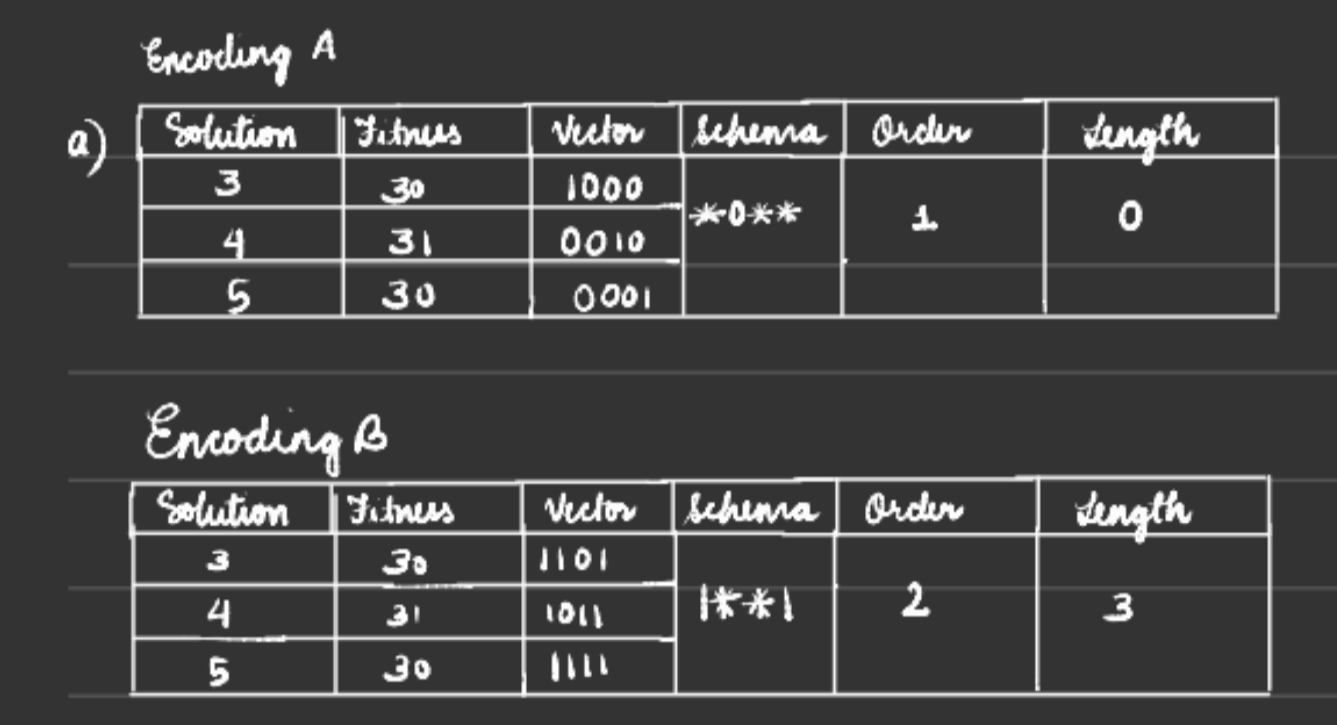

For the best fitness, choosing encoding A might be more helpful since the order is less and there are many ways to depict the vectors. I am choosing encoding B simply because I am more curious about the results as both Charis and Joshua are choosing encoding A and I am intrigued to see how different the results will be.


#### 2) Assume we draw candidate solutions 𝑥 =10, 𝑥 =1, 𝑥 =15, 𝑥 =6, 𝑥 =0, 𝑥 =9 as our initial population for GA optimization. Using your chosen encoding, list encoded solutions and their fitness. Pair the population so that the fittest members are paired with the least fit. 
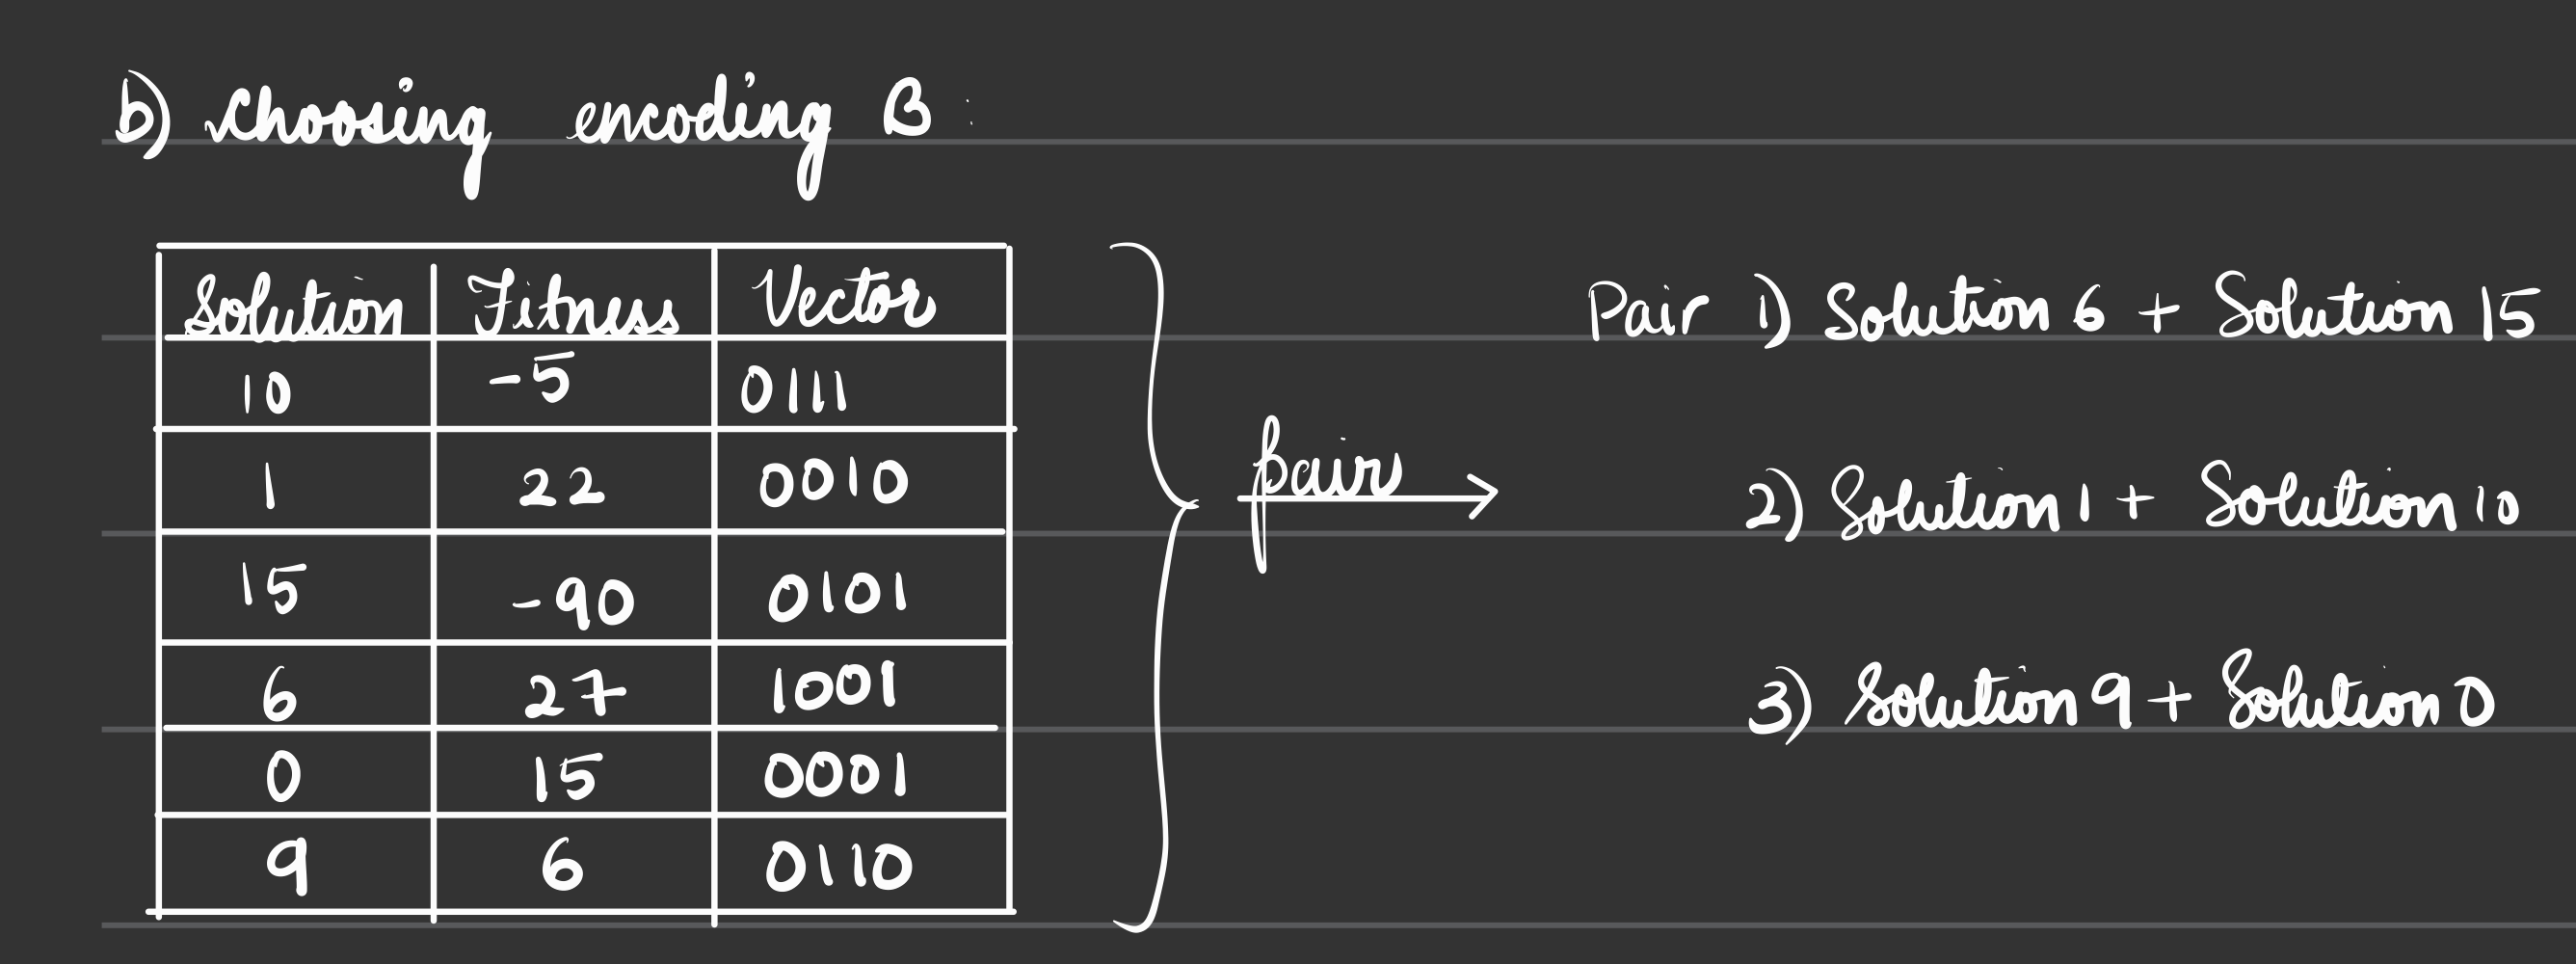

#### 3) Use  the  cross-over  operator  by  defining  the  cross-over  point  between  the  1st  and  2nd  element. Exchange the last three elements between the pairs of strings. Do we have new solutions, and if so, what is their fitness? Have we increased fitness of population as a whole? What is the best solution? 

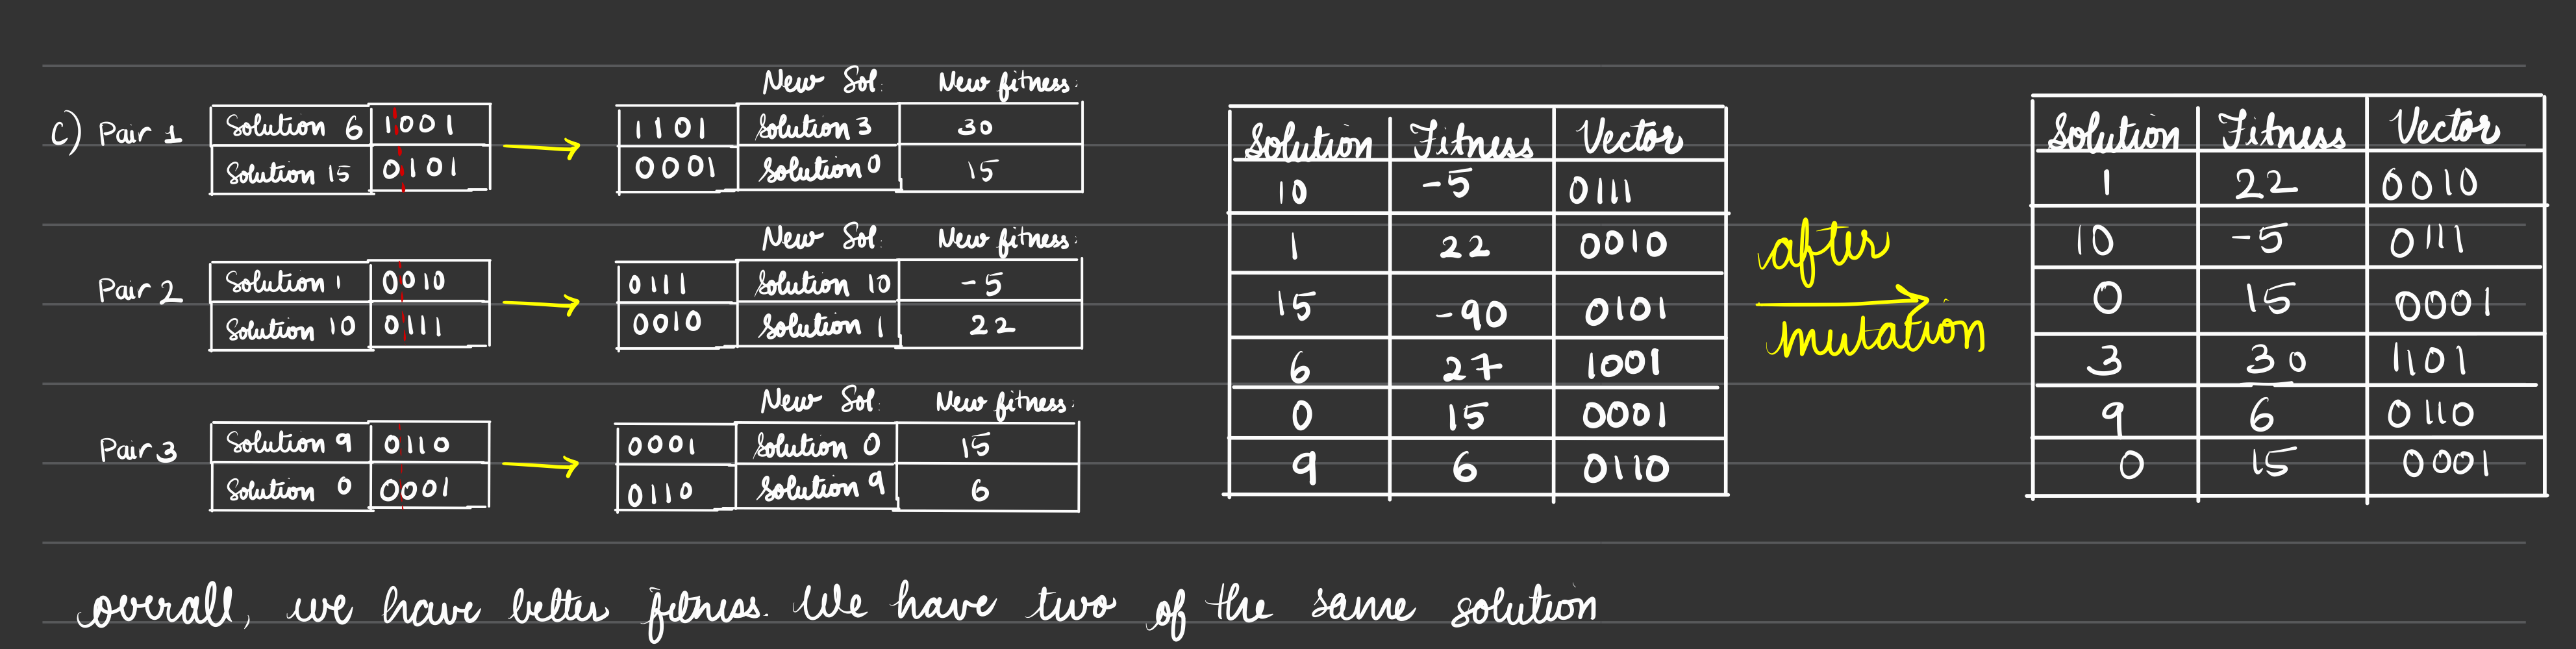

There are some new solutions which have also yielded in better overall fitness The average overall fitness is 13.8, this is compared to the inital fitness of -4. The best solution at this stage is solution 3. 

#### 4) Using population generated in (c), mutate 3rd element. Do we have new solutions, and if so, what are their fitness? Does mutation increase fitness of population as a whole? Did we find a better solution? 

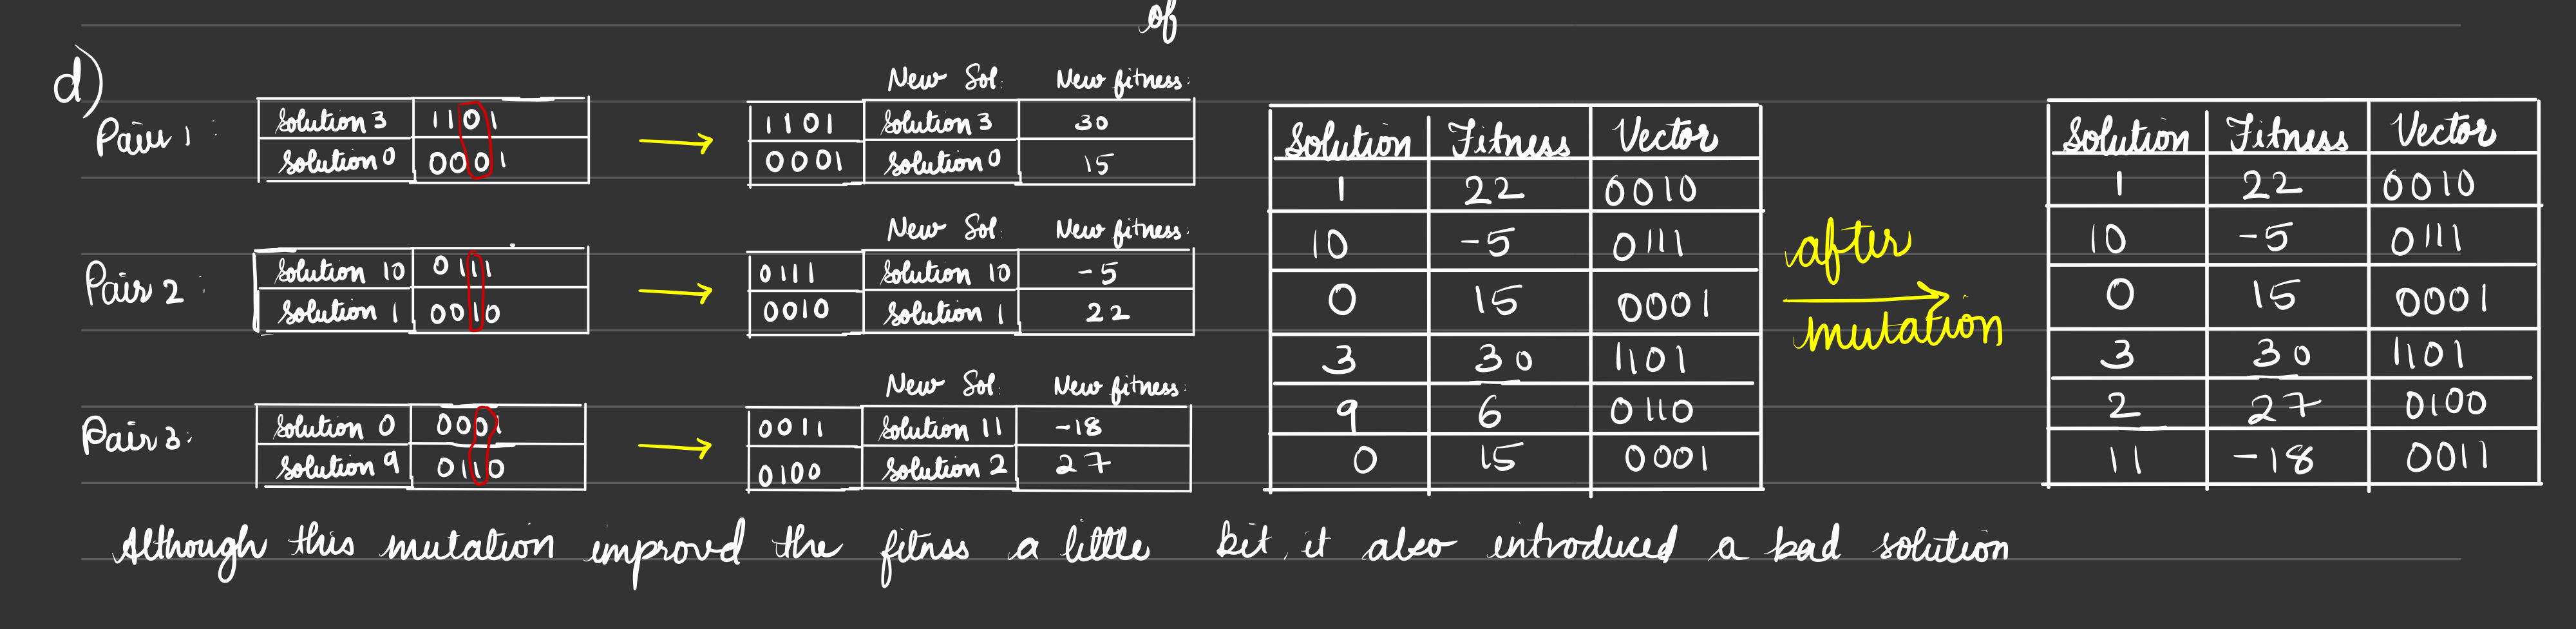

The mutation introduced new solution but it also reduced the fitness as the current overall fitness is 11.8 (previously 13.8). The best solution at this stage is still Solution 3. 

#### 5) Using  population  generated  in  (d),  eliminate  least  fit  member,  and  replace  with  cloned  best member. Do 2-point cross-over by exchanging inner two elements between pairs. Do we have new solutions and  what  are  their  fitness?  Have  we  increased  fitness  of  population  as  a  whole?  Did  we  find  a  better solution? 
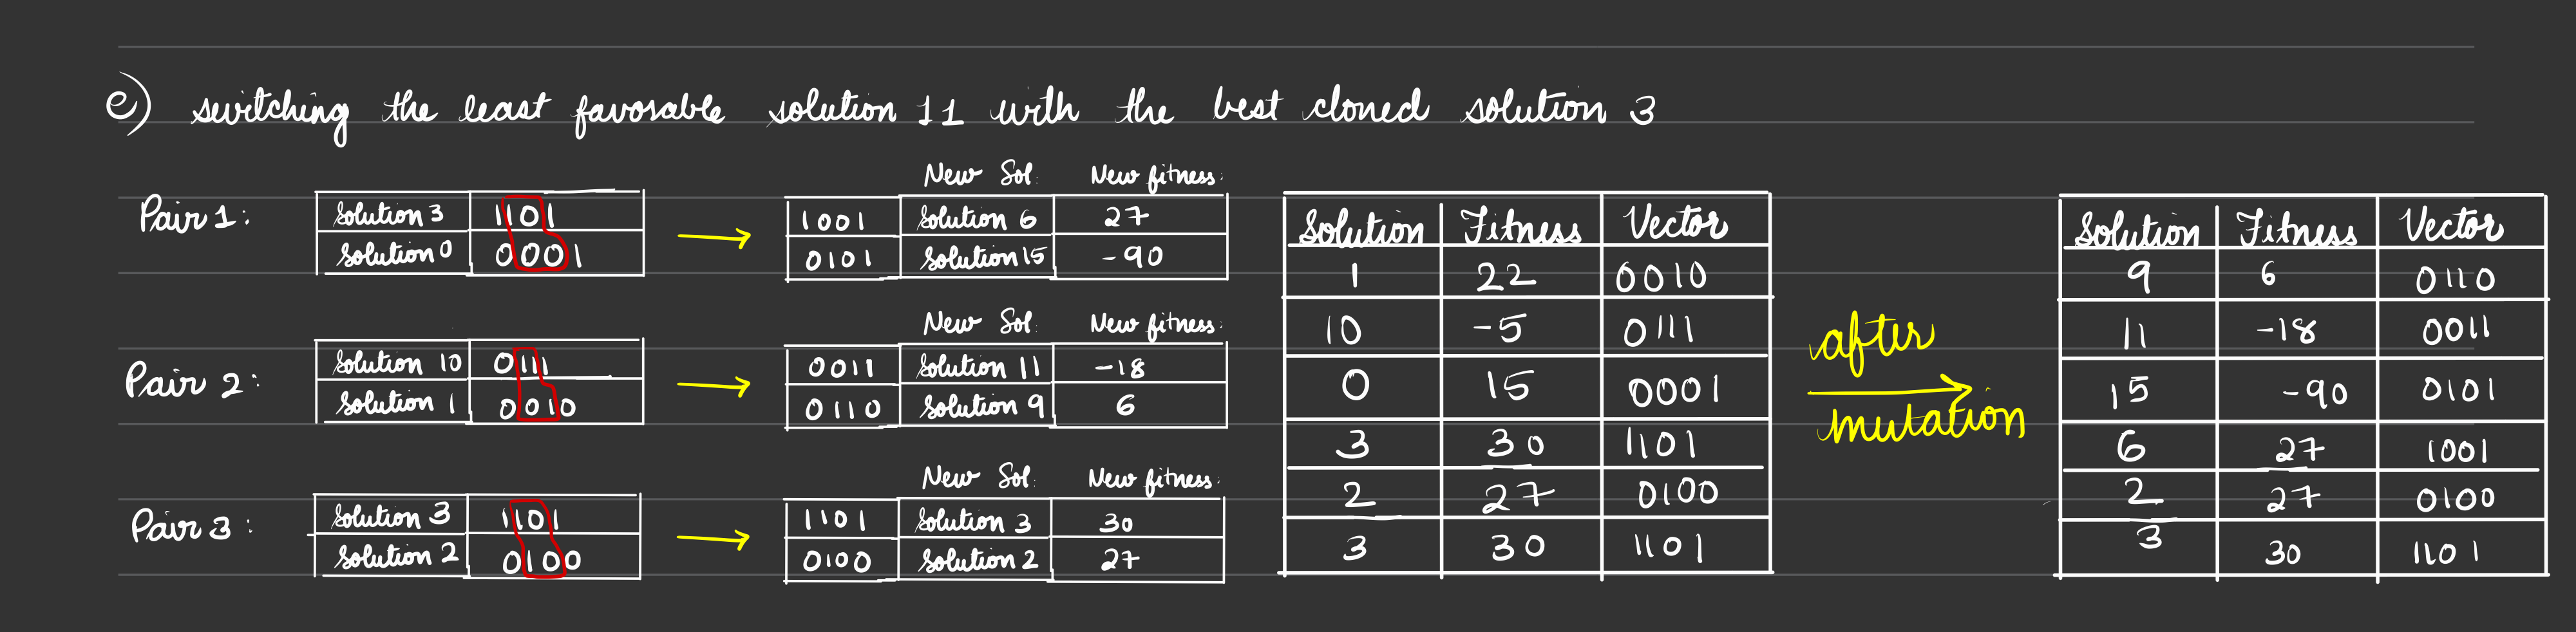

The mutation introduced some new solutions but it also brought back some of the older least fit members. The new overall fitness is now -3, which is much much worse than previous mutations. The best solution is still Solution 3. 

#### 6) Using population generated in (e), eliminate least fit member, and replace with cloned best member. Do cross-over between 3rd and 4th elements and exchange first three elements between pairs. Do we have new solutions, and what are their fitness? Have we increased the fitness of population as a whole? Did we find a better solution?

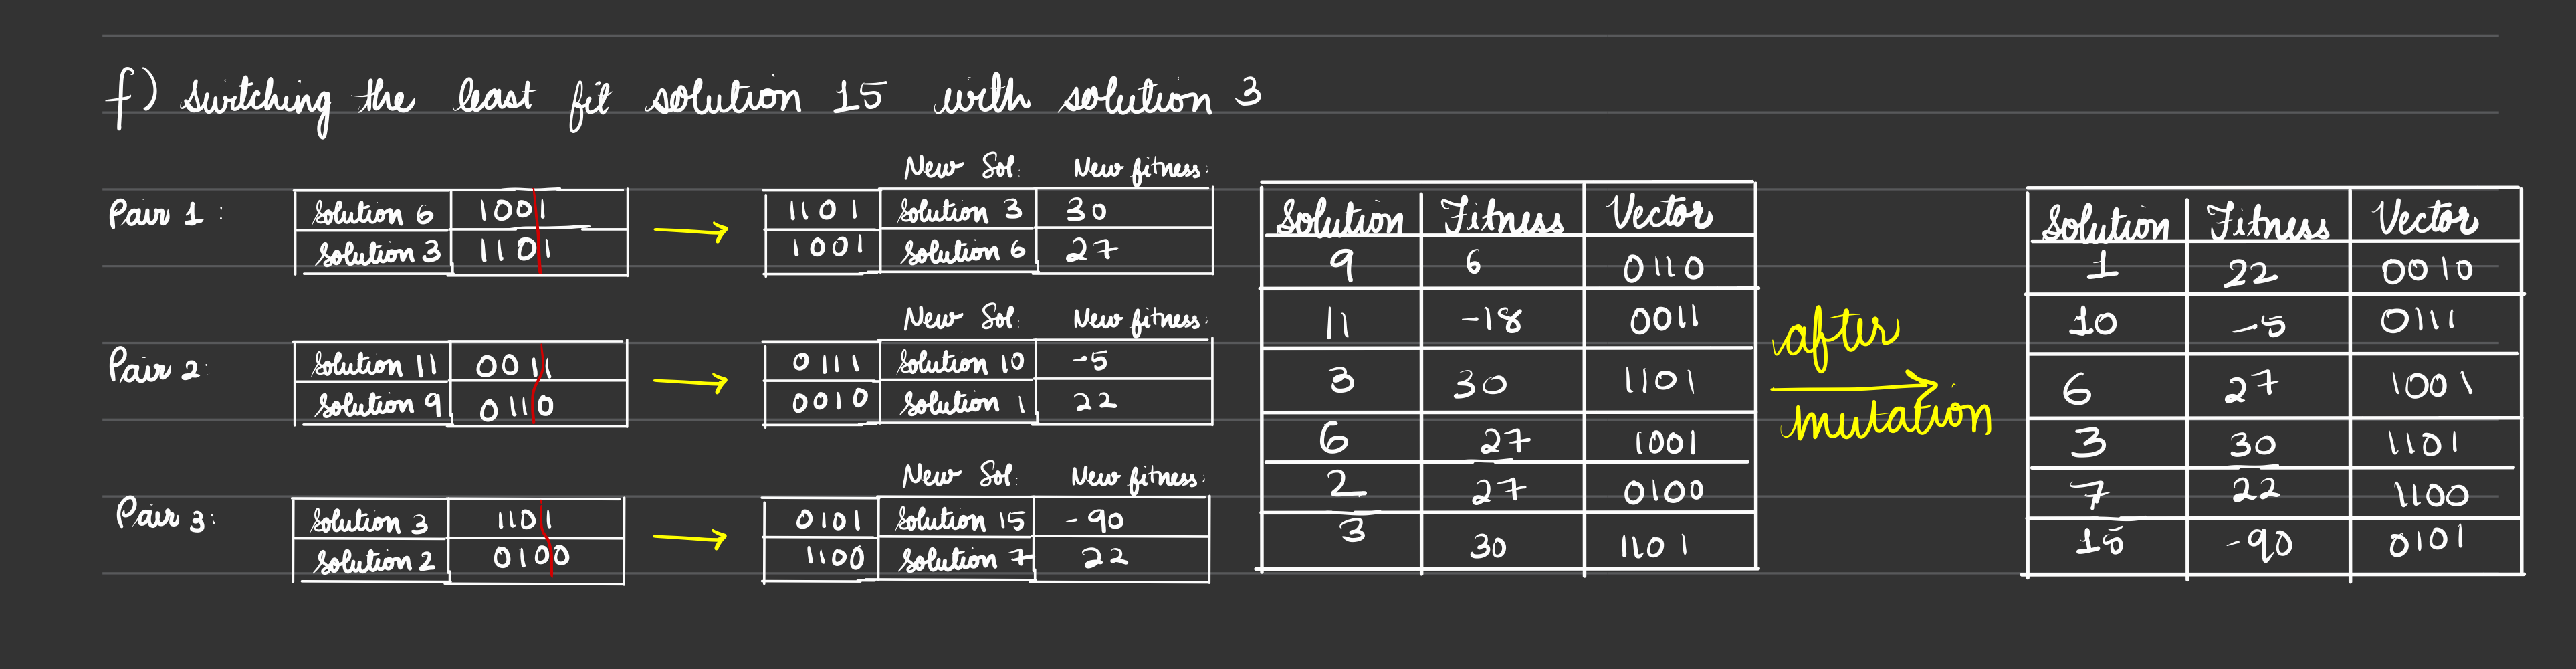

The new mutation did not introduce any major new members that were not already present at some point before. I believe this time we have solution 7 as well. The new overall fitness is 1. A better solution was still not found. 

#### 6) Do you think that the encoding of the solution space was adequate? Why?  
I believe it was adequate because after a while all the mutations were leading to the similar value with no improvements. Some things that might have made a difference is changing the order in which the mutations were taken place or potentially using different conditions for replacement. But in the last few rounds, the overall fitnes was simple rotating between the same values. 

# Artificial Neural Network 

### In  lecture  we  saw  that  ANN  can  be  used  for  secondary  structure prediction of alpha-helix, beta-sheet, or random coil given the amino acid sequence as input. Each amino acid  is  represented  by  two  numbers,  the  first  representing  its  propensity  to  be  hydrophobic  (+1)  or hydrophilic (-1), while the second is its propensity to form helix (+1) or not helix (-1). A helix is predicted by the network if the output is (1,-1), −sheet if output is (-1,1), and coil if (-1,-1). We could design two simple Boolean functions as part of a bigger network with the following connectivity

#### a) The following cell contains the code for neural network using NumPy. The weights have also been initialized to random values between 0 and 1 under the method init_weight

In [2]:
# a simple neural network using backpropagation
import numpy as np 

class NN:
    def __init__(self, architecture, learning_rate, activation_function):
        self.architecture = architecture
        self.learning_rate = learning_rate
        self.activation_function = activation_function
        self.depth = len(architecture)
        self.init_weight()

    def init_weight(self):
        self.weight = [] 
        self.biases = []
        for i in range(self.depth - 1):
            # random number to initialize weights
            self.weight.append(np.random.randn(self.architecture[i], self.architecture[i+1]))
            self.biases.append(np.random.randn(self.architecture[i+1]))
        
    def feed_forward(self, X):
        self.a = [X]
        self.z = []
        for i in range(self.depth - 1):
            self.z.append(np.dot(self.a[i], self.weight[i]) + self.biases[i])
            self.a.append(self.activation_function(self.z[i]))
        return self.a[-1]

    def calc_error(self, y, activation_grad):
        self.error = [y - self.a[-1]]
        for i in range(self.depth - 2, 0, -1):
            self.error.insert(0, np.dot(self.error[0], self.weight[i].T) * activation_grad(self.z[i]))

    def calc_grad(self):
        self.grad_weight = []
        self.grad_biases = []
        for i in range(self.depth - 1):
            self.grad_weight.append(np.dot(self.a[i].T, self.error[i]))
            self.grad_biases.append(np.sum(self.error[i], axis=0))

    def back_prop(self):
        for i in range(self.depth - 1):
            self.weight[i] -= self.learning_rate * self.grad_weight[i]
            self.biases[i] -= self.learning_rate * self.grad_biases[i]

    def train(self, X, y, activation_grad):
        self.feed_forward(X)
        self.calc_error(y, activation_grad)
        self.calc_grad()
        self.back_prop()

    def predict(self, X):
        return self.feed_forward(X)

#### b) Given the following input values for one pattern: i-1=(-1,1)  i=(-1,-1)  i+4=(1,-1) Feedforward through the above network and give the calculated output for this pattern and corresponding secondary structure definition (assume a hyperbolic tangent activation function, and its derivative is given as:  𝑑tanh𝑥 𝑑𝑥 =1−tanh2 𝑥 )

In [3]:
X = np.array([-1,1, -1, -1, 1, -1]).reshape(1, 6)
nn = NN([6, 2, 2], 0.1, np.tanh)
print(nn.predict(X))

[[-0.49007953 -0.48156894]]


#### c) and d) The actual observed output for this one pattern is (-1,-1). Define the error and calculate it for all nodes that are not in the input layer. Using back-propagation, give a formula for the weight update of all of the wij’s, and then calculate weight adjustments with a learning parameter.

#### The calc_error and back_prop function along with calc_grad functions have already been updated in the class. 

In [4]:
X = np.array([-1,-1, 1, 1, -1, 1]).reshape(1, 6)
nn = NN([6, 2, 2], 0.1, np.tanh)
y = np.array([-1,-1]).reshape(1, 2)  
nn.train(X, y, lambda x: 1 - np.tanh(x)**2)
#print the error in the nodes 
print("Initialized prediction: ", nn.predict(X))
print("Error in nodes:", nn.error)
nn.train(X, y, lambda x: 1 - np.tanh(x)**2)
print("Prediction after fitting once: ", nn.predict(X))

Initialized prediction:  [[-0.9985118  -0.99915098]]
Error in nodes: [array([[-1.12462938e-05,  4.11634671e-06]]), array([[-0.00148695, -0.00084862]])]
Prediction after fitting once:  [[-0.99851055 -0.99915057]]
